# Statistical Inference and Hypothesis Testing

**Statistics** is a science of inference. It is the science of generalization from a part(the randomly chosen sample) to the whole (the population).

**Statistical inference** is the process of deducing properties of an underlying distribution by analysis of data. Inferential statistical analysis infers properties about a population: this includes testing hypotheses and deriving estimates.

Statistics are helpful in analyzing most collections of data. **Hypothesis testing** can justify conclusions even when no scientific theory exists.

## Average Experience of Data Science Specialization(DSS) batch with Statistical Inference

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Let us explore the original data

dss_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,  
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,  
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,  
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,  
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,  
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,  
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,  
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,  
                    15,  16,  18,  13])

### Understanding the Underlying distribution

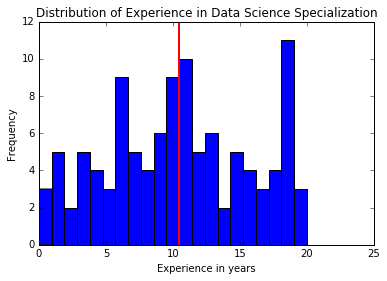

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [7]:
# Plot the distribution of Experience
plt.hist(dss_exp, range = (0,20), bins = 21)
# Add axis labels
plt.xlabel("Experience in years")
plt.ylabel("Frequency")
plt.title("Distribution of Experience in Data Science Specialization")
plt.axvline(x=dss_exp.mean(), linewidth=2, color = 'r')
plt.show()

# Statistics of DSS Batch experience
print("Mean Experience of DSS Batch: {:4.3f}".format(dss_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(dss_exp.std()))


In [18]:
# Set the parameters for sampling
n = 100
NUM_TRIALS = 1000

### Estimating DSS Experience from samples

In [19]:
#Just try for 1 iteration

samp = np.random.choice(dss_exp, size = n, replace = True)
samp_mean = samp.mean()
samp_sd = samp.std()
print("Samp_mean = {:4.3f} Sample_SD = {:4.3f}".format(samp_mean, samp_sd))


Samp_mean = 10.560 Sample_SD = 5.906


In [20]:
# Distribution of Sample means

mn_array = np.zeros(NUM_TRIALS)
sd_array = np.zeros(NUM_TRIALS)

# Extract Random Samples and compute mean & standard deviation
for i in range(NUM_TRIALS):
  samp = np.random.choice(dss_exp, size = n, replace = True)
  mn_array[i] = samp.mean()


Mean = 10.446, Std Dev = 0.566, 5% Pct = 9.559, 95% Pct = 11.391


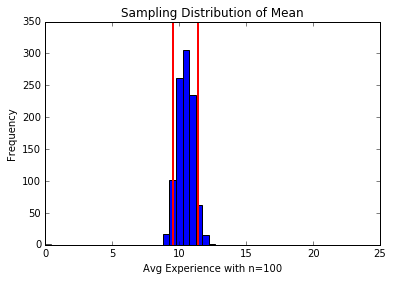

In [21]:
# Annotate the distribution - Not important for understanding
mn = mn_array.mean()
sd = mn_array.std()
x5_pct = np.percentile(mn_array, 5.0)
x95_pct = np.percentile(mn_array, 95.0)
print("Mean = {:4.3f}, Std Dev = {:4.3f}, 5% Pct = {:4.3f}, 95% Pct = {:4.3f}".format(mn, sd, x5_pct, x95_pct))


# Plot Sampling distribution of Mean    
plt.hist(mn_array, range=(0,20), bins = 41)
# Add axis labels
plt.xlabel("Avg Experience with n={}".format(n))
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Mean")
plt.axvline(x=x5_pct, linewidth=2, color = 'r')
plt.axvline(x=x95_pct, linewidth=2, color = 'r')
plt.show()

In [22]:
# Function to check if the true mean lies within 90% Confidence Interval

def samp_mean_within_ci(mn, l_5pct, u_95pct):
    out = True
    if (mn < l_5pct) | (mn > u_95pct):
        out = False
        
    return out

In [23]:
# Estimation and Confidence Interval
#np.random.seed(100) # seed value is set to reproduce the results

samp = np.random.choice(dss_exp, size = n, replace = True)
samp_mean = samp.mean()
samp_sd = samp.std()
sd_ci = samp_sd/np.sqrt(n)

samp_lower_5pct = samp_mean - 1.645 * sd_ci
samp_upper_95pct = samp_mean + 1.645 * sd_ci
print("Sample: L_5PCT = {:4.3f} M = samp_mean = {:4.3f} H_95PCT = {:4.3f}".format(samp_lower_5pct, samp_mean, samp_upper_95pct))
mn_within_ci_flag = samp_mean_within_ci(samp_mean, x5_pct, x95_pct)
print("True mean lies with the 90% confidence Intervel = {}".format(mn_within_ci_flag))

Sample: L_5PCT = 9.801 M = samp_mean = 10.740 H_95PCT = 11.679
True mean lies with the 90% confidence Intervel = True


## Hypothesis Testing

Let us define the Hypotheses as follows:
- **H0** : Average Experience of Current Batch & Previous batch are **same**
- **H1** : Average Experience of Current Batch & Previous batch are **different**

In [ ]:
# Previous Batch Data for working experience
dss_exp_prev = np.array([1, 14,  6,  7, 10, 10, 19, 15, 19, 15, 
                    2,  2, 14, 14, 14,  3,  0,  4, 11,  7, 
                    1,  2,  0,  1,  2,  2,  2,  1,  1,  2, 
                    4,  4,  3,  3,  3,  3,  4,  3,  3,  7, 
                    8,  6,  6,  6,  7, 8, 8, 8, 8, 7, 
                    8, 0, 0, 7, 6, 9, 10, 9, 9, 11, 
                    11, 9, 10, 10, 11, 10, 11, 9, 9, 9, 
                    12, 14, 13, 14, 18, 14, 11, 10, 17, 20, 
                    18, 5, 13, 4, 2, 4, 3, 12, 12, 14, 
                    12, 12, 10, 14, 4, 11, 9])

In [ ]:
avg_exp_prev = dss_exp_prev.mean()
std_exp_prev = dss_exp_prev.std()
print("Previous DSS Batch: Avg Exp - {:4.3f} Std Dev - {:4.3f}".format(avg_exp_prev, std_exp_prev))

plt.hist(dss_exp_prev, range=(0,20), bins = 21)
plt.axvline(x=dss_exp_prev.mean(), linewidth=2, color = 'r')
plt.show()

In [ ]:
np.random.seed(100)
n = 20

dss_mean = dss_exp.mean()
dss_sd   = dss_exp.std()
print("Current DSS Batch : Population Mean - {:4.3f}".format(dss_mean))

dss_prev_samp = np.random.choice(dss_exp_prev, size = n, replace = True)
dss_prev_samp_mean = dss_prev_samp.mean()
print("Previous DSS Batch Sample Mean: {:4.3f}".format(dss_prev_samp_mean))

In [ ]:
from scipy import stats
t_statistic = (dss_prev_samp_mean - dss_mean)/(dss_sd/np.sqrt(n))
p_val = 2 * stats.t.cdf(t_statistic, df= (n-1))
print("T-Statistic : {:4.2f}, p-Value = {:4.2f}".format(t_statistic,p_val))

### Summary
Above code describes to do hypothesis testing based on the intuition from Sampling distribution of mean. There will be differences with exact math based on various conditions and assumptions made.

### Appendix Code

In [ ]:
from collections import Counter
c = Counter(dss_exp)
print(c)

In [ ]:
# Create random samples to check if the true mean lie within the specified confidence Interval

samp_mn_vec, lower_5pct, upper_95pct, flag_true_mean_within_ci = (np.zeros(NUM_TRIALS), np.zeros(NUM_TRIALS), np.zeros(NUM_TRIALS), np.zeros(NUM_TRIALS))
for i in range(NUM_TRIALS):
    samp = np.random.choice(dss_exp, size = n, replace = True)
    samp_mn_vec[i] = samp.mean()
    samp_sd = samp.std()
    sd_ci = samp_sd/np.sqrt(n)
    lower_5pct[i] = samp_mn_vec[i] - 1.645 * sd_ci
    upper_95pct[i] = samp_mn_vec[i] + 1.645 * sd_ci
    flag_true_mean_within_ci[i] = int(samp_mean_within_ci(samp_mn_vec[i], x5_pct, x95_pct))
    #print(x5_pct, samp_mn_vec[i], x95_pct, lower_5pct[i], upper_95pct[i], flag_true_mean_within_ci[i])
    
df = pd.DataFrame(np.column_stack((samp_mn_vec,lower_5pct,upper_95pct, flag_true_mean_within_ci)), columns = ['samp_mean', 'lower_5pct', 'upper_95pct', 'flag_true_mean_within_ci' ])    
df.to_csv('expt_n{}_iters{}.csv'.format(n, NUM_TRIALS)) 

In [ ]:
# For 2-tailed hypothesis testing 
# Ref: http://www.scipy-lectures.org/packages/statistics/index.html#hypothesis-testing-comparing-two-groups
from scipy import stats
dss_exp_prev_samp = np.random.choice(dss_exp_prev, size = 20, replace = True)
dss_exp_samp = np.random.choice(dss_exp, size = 20, replace = True)
stats.ttest_ind(dss_exp_prev_samp, dss_exp_samp)